In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\mosta\Downloads\quantium\QVI_transaction_data.csv")
df2 = pd.read_csv(r"C:\Users\mosta\Downloads\quantium\QVI_purchase_behaviour.csv")
df2

LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0                1000   YOUNG SINGLES/COUPLES          Premium
1                1002   YOUNG SINGLES/COUPLES       Mainstream
2                1003          YOUNG FAMILIES           Budget
3                1004   OLDER SINGLES/COUPLES       Mainstream
4                1005  MIDAGE SINGLES/COUPLES       Mainstream
...               ...                     ...              ...
72632         2370651  MIDAGE SINGLES/COUPLES       Mainstream
72633         2370701          YOUNG FAMILIES       Mainstream
72634         2370751          YOUNG FAMILIES          Premium
72635         2370961          OLDER FAMILIES           Budget
72636         2373711   YOUNG SINGLES/COUPLES       Mainstream

[72637 rows x 3 columns]

In [12]:
#DATA_cleaning
df.dropna(inplace=True)
df['DATE'] = pd.to_datetime(df['DATE']) 
df["PACK_SIZE"] = df["PROD_NAME"].str.extract(r'(\d{2,3})g').astype(float)
df["BRAND"] = df["PROD_NAME"].str.split().str[0]
# Merge transaction data with purchase behavior data on LYLTY_CARD_NBR
merged_data = df.merge(df2, on="LYLTY_CARD_NBR", how="left")
merged_data.head()


DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 1970-01-01 00:00:00.000043390          1            1000       1         5   
1 1970-01-01 00:00:00.000043599          1            1307     348        66   
2 1970-01-01 00:00:00.000043605          1            1343     383        61   
3 1970-01-01 00:00:00.000043329          2            2373     974        69   
4 1970-01-01 00:00:00.000043330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  \
0    Natural Chip        Compny SeaSalt175g         2        6.0      175.0   
1                  CCs Nacho Cheese    175g         3        6.3      175.0   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9      170.0   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0      175.0   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8      150.0   

     BRAND               LIFESTAGE PREMIUM_CUSTOMER  
0  Natural   YOUNG SINGLES/COUPLES          Premium  
1      CCs  MIDAGE SINGLES/COUPLES           Budget  
2   Smiths  MIDAGE SINGLES/COUPLES           Budget  
3   Smiths  MIDAGE SINGLES/COUPLES           Budget  
4   Kettle  MIDAGE SINGLES/COUPLES           Budget

In [13]:
df.sort_values(by=['TOT_SALES'], ascending=False, inplace=True)
df.head(20)

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  \
69762  1970-01-01 00:00:00.000043331        226          226000  226201   
69763  1970-01-01 00:00:00.000043605        226          226000  226210   
150683 1970-01-01 00:00:00.000043605        118          118021  120799   
5179   1970-01-01 00:00:00.000043327         94           94148   93390   
55558  1970-01-01 00:00:00.000043599        190          190113  190914   
171815 1970-01-01 00:00:00.000043329         24           24095   20797   
69496  1970-01-01 00:00:00.000043327         49           49303   45789   
117850 1970-01-01 00:00:00.000043604        194          194308  194516   
184969 1970-01-01 00:00:00.000043605         44           44350   40394   
204362 1970-01-01 00:00:00.000043332        222          222005  221532   
32248  1970-01-01 00:00:00.000043601         66           66014   63251   
185344 1970-01-01 00:00:00.000043602        180          180233  182542   
81301  1970-01-01 00:00:00.000043326        243          243345  247084   
72     1970-01-01 00:00:00.000043331         96           96203   96025   
135445 1970-01-01 00:00:00.000043326        154          154199  154279   
135346 1970-01-01 00:00:00.000043327        101          101110  100677   
117918 1970-01-01 00:00:00.000043605        221          221351  221349   
17110  1970-01-01 00:00:00.000043328        172          172239  174254   
117917 1970-01-01 00:00:00.000043330        221          221184  220787   
81110  1970-01-01 00:00:00.000043329        181          181129  183109   

        PROD_NBR                                 PROD_NAME  PROD_QTY  \
69762          4          Dorito Corn Chp     Supreme 380g       200   
69763          4          Dorito Corn Chp     Supreme 380g       200   
150683        14    Smiths Crnkle Chip  Orgnl Big Bag 380g         5   
5179          14    Smiths Crnkle Chip  Orgnl Big Bag 380g         5   
55558         14    Smiths Crnkle Chip  Orgnl Big Bag 380g         5   
171815        14    Smiths Crnkle Chip  Orgnl Big Bag 380g         5   
69496         14    Smiths Crnkle Chip  Orgnl Big Bag 380g         5   
117850        14    Smiths Crnkle Chip  Orgnl Big Bag 380g         5   
184969        14    Smiths Crnkle Chip  Orgnl Big Bag 380g         5   
204362         7         Smiths Crinkle      Original 330g         5   
32248         23                      Cheezels Cheese 330g         5   
185344        23                      Cheezels Cheese 330g         5   
81301         16  Smiths Crinkle Chips Salt & Vinegar 330g         5   
72             7         Smiths Crinkle      Original 330g         5   
135445        20          Doritos Cheese      Supreme 330g         5   
135346        16  Smiths Crinkle Chips Salt & Vinegar 330g         5   
117918        23                      Cheezels Cheese 330g         5   
17110          7         Smiths Crinkle      Original 330g         5   
117917        16  Smiths Crinkle Chips Salt & Vinegar 330g         5   
81110         23                      Cheezels Cheese 330g         5   

        TOT_SALES  PACK_SIZE     BRAND  
69762       650.0      380.0    Dorito  
69763       650.0      380.0    Dorito  
150683       29.5      380.0    Smiths  
5179         29.5      380.0    Smiths  
55558        29.5      380.0    Smiths  
171815       29.5      380.0    Smiths  
69496        29.5      380.0    Smiths  
117850       29.5      380.0    Smiths  
184969       29.5      380.0    Smiths  
204362       28.5      330.0    Smiths  
32248        28.5      330.0  Cheezels  
185344       28.5      330.0  Cheezels  
81301        28.5      330.0    Smiths  
72           28.5      330.0    Smiths  
135445       28.5      330.0   Doritos  
135346       28.5      330.0    Smiths  
117918       28.5      330.0  Cheezels  
17110        28.5      330.0    Smiths  
117917       28.5      330.0    Smiths  
81110        28.5      330.0  Cheezels

In [14]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df["TOT_SALES"].quantile(0.25)
Q3 = df["TOT_SALES"].quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range

# Define the outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df["TOT_SALES"] < lower_bound) | (df["TOT_SALES"] > upper_bound)]
print("Outliers detected using IQR method:")
print(outliers)


Outliers detected using IQR method:
                                DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  \
69762  1970-01-01 00:00:00.000043331        226          226000  226201   
69763  1970-01-01 00:00:00.000043605        226          226000  226210   
150683 1970-01-01 00:00:00.000043605        118          118021  120799   
5179   1970-01-01 00:00:00.000043327         94           94148   93390   
55558  1970-01-01 00:00:00.000043599        190          190113  190914   
...                              ...        ...             ...     ...   
185364 1970-01-01 00:00:00.000043328        191          191130  192521   
228562 1970-01-01 00:00:00.000043602         74           74436   73279   
184900 1970-01-01 00:00:00.000043601         22           22404   18630   
32825  1970-01-01 00:00:00.000043604        247          247073  249037   
3      1970-01-01 00:00:00.000043329          2            2373     974   

        PROD_NBR                               PROD_NAME  PROD_

In [15]:
df ['PROD_NAME'] = df['PROD_NAME'].str.strip().copy()
df['PROD_NAME'] = df['PROD_NAME'].str.replace('\'', '')
df['PROD_NAME'] = df['PROD_NAME'].str.replace('\"', '')

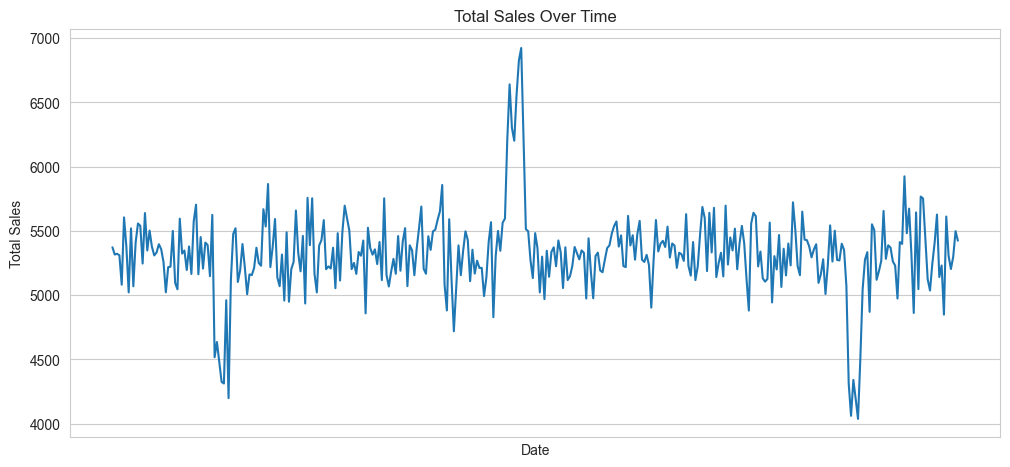

C:\Users\mosta\AppData\Local\Temp\ipykernel_5464\1133544630.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values, palette="viridis")


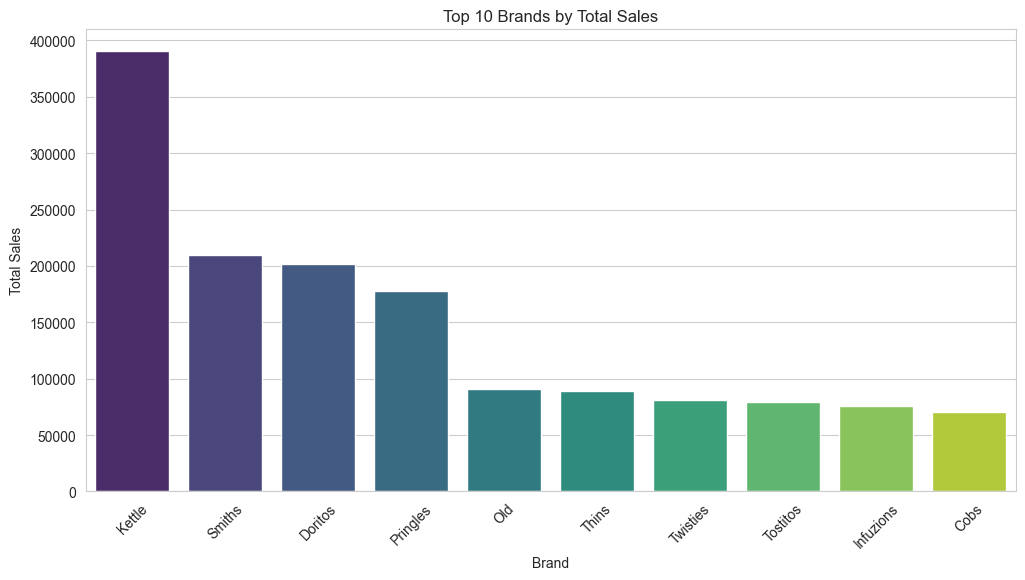

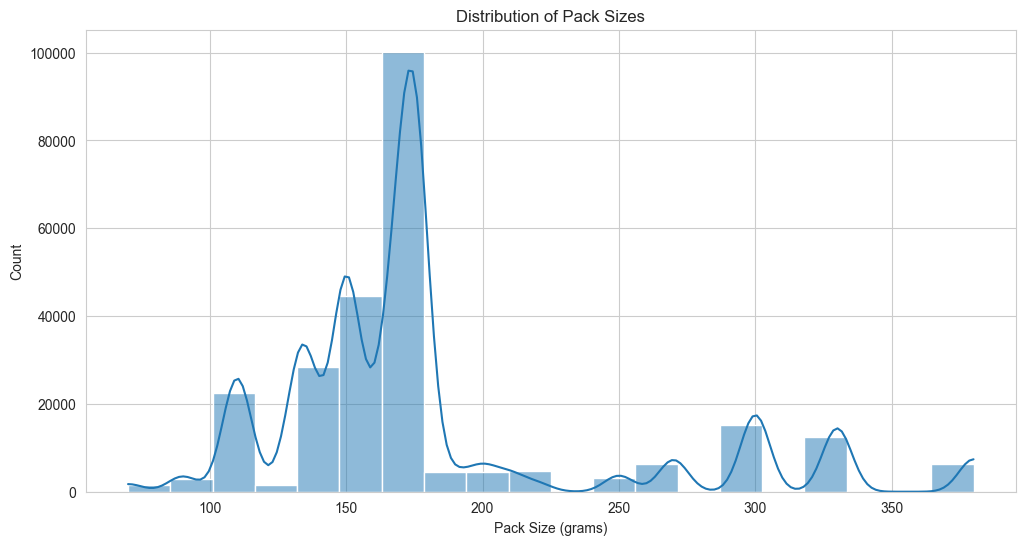

In [16]:

# Set style
sns.set_style("whitegrid")

# 1. Sales Trend Over Time
plt.figure(figsize=(12, 6))
merged_data.groupby("DATE")["TOT_SALES"].sum().plot()
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

# 2. Top 10 Brands by Total Sales
top_brands = merged_data.groupby("BRAND")["TOT_SALES"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_brands.index, y=top_brands.values, palette="viridis")
plt.title("Top 10 Brands by Total Sales")
plt.xlabel("Brand")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

# 3. Pack Size Distribution
plt.figure(figsize=(12, 6))
sns.histplot(merged_data["PACK_SIZE"], bins=20, kde=True)
plt.title("Distribution of Pack Sizes")
plt.xlabel("Pack Size (grams)")
plt.ylabel("Count")
plt.show()


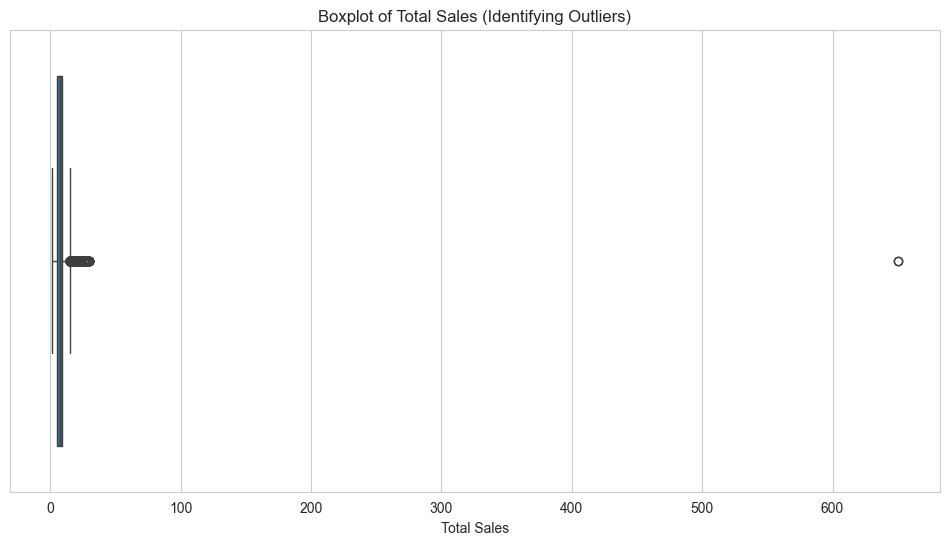

DATE   STORE_NBR  LYLTY_CARD_NBR  \
count                            578  578.000000      578.000000   
mean   1970-01-01 00:00:00.000043462  136.937716   137108.588235   
min    1970-01-01 00:00:00.000043300    2.000000     2373.000000   
25%    1970-01-01 00:00:00.000043329   71.250000    71357.000000   
50%    1970-01-01 00:00:00.000043332  131.000000   131416.000000   
75%    1970-01-01 00:00:00.000043602  206.500000   206678.000000   
max    1970-01-01 00:00:00.000043605  272.000000   272037.000000   
std                              NaN   76.267882    76265.095826   

              TXN_ID    PROD_NBR    PROD_QTY   TOT_SALES   PACK_SIZE  
count     578.000000  578.000000  578.000000  578.000000  571.000000  
mean   136860.384083   53.557093    5.122837   21.899740  202.591944  
min       974.000000    2.000000    3.000000   15.000000  110.000000  
25%     69988.750000   23.000000    4.000000   16.800000  150.000000  
50%    135758.000000   50.000000    5.000000   18.500000  175.000000  
75%    205112.250000   84.000000    5.000000   22.000000  270.000000  
max    269678.000000  114.000000  200.000000  650.000000  380.000000  
std     77537.789198   33.483140   11.514310   37.227518   78.630425

In [17]:
# Identify outliers in TOTAL SALES using IQR method
Q1 = merged_data["TOT_SALES"].quantile(0.25)
Q3 = merged_data["TOT_SALES"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = merged_data[(merged_data["TOT_SALES"] < lower_bound) | (merged_data["TOT_SALES"] > upper_bound)]

# Plot the distribution with outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=merged_data["TOT_SALES"])
plt.title("Boxplot of Total Sales (Identifying Outliers)")
plt.xlabel("Total Sales")
plt.show()

# Display summary of outliers
outliers.describe()


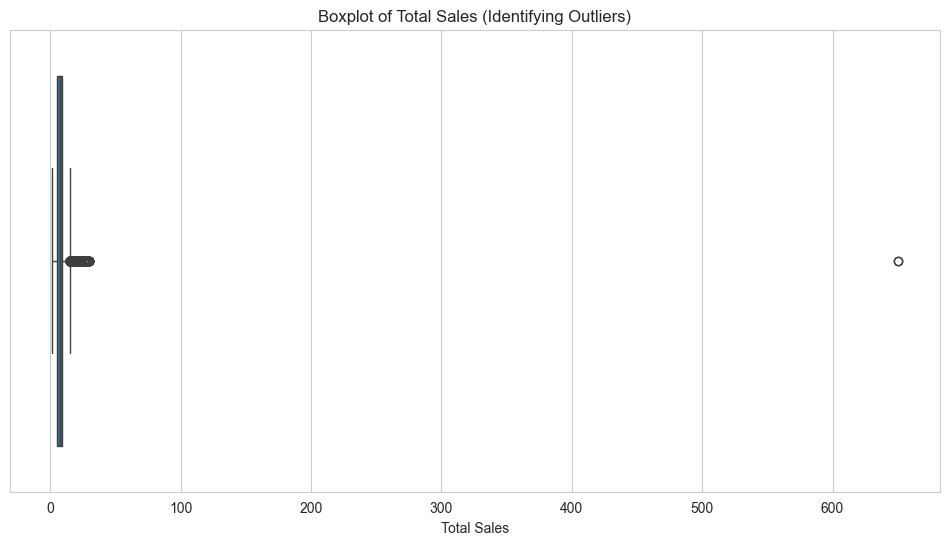

                                DATE   STORE_NBR  LYLTY_CARD_NBR  \
count                            578  578.000000      578.000000   
mean   1970-01-01 00:00:00.000043462  136.937716   137108.588235   
min    1970-01-01 00:00:00.000043300    2.000000     2373.000000   
25%    1970-01-01 00:00:00.000043329   71.250000    71357.000000   
50%    1970-01-01 00:00:00.000043332  131.000000   131416.000000   
75%    1970-01-01 00:00:00.000043602  206.500000   206678.000000   
max    1970-01-01 00:00:00.000043605  272.000000   272037.000000   
std                              NaN   76.267882    76265.095826   

              TXN_ID    PROD_NBR    PROD_QTY   TOT_SALES   PACK_SIZE  
count     578.000000  578.000000  578.000000  578.000000  571.000000  
mean   136860.384083   53.557093    5.122837   21.899740  202.591944  
min       974.000000    2.000000    3.000000   15.000000  110.000000  
25%     69988.750000   23.000000    4.000000   16.800000  150.000000  
50%    135758.000000   50.000000

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify outliers in TOTAL SALES using IQR method
Q1 = merged_data["TOT_SALES"].quantile(0.25)
Q3 = merged_data["TOT_SALES"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = merged_data[(merged_data["TOT_SALES"] < lower_bound) | (merged_data["TOT_SALES"] > upper_bound)]

# Plot the distribution with outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=merged_data["TOT_SALES"])
plt.title("Boxplot of Total Sales (Identifying Outliers)")
plt.xlabel("Total Sales")
plt.show()

# Display summary of outliers
print(outliers.describe())


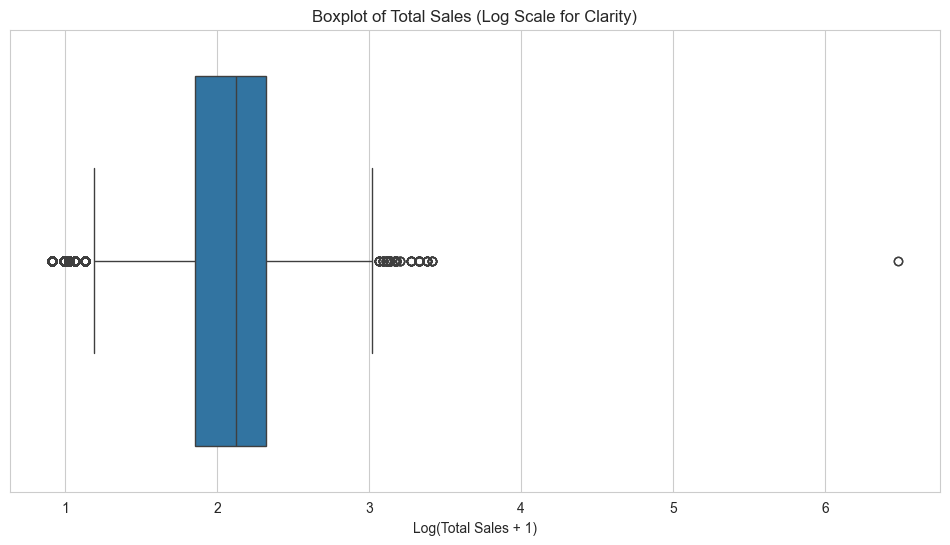

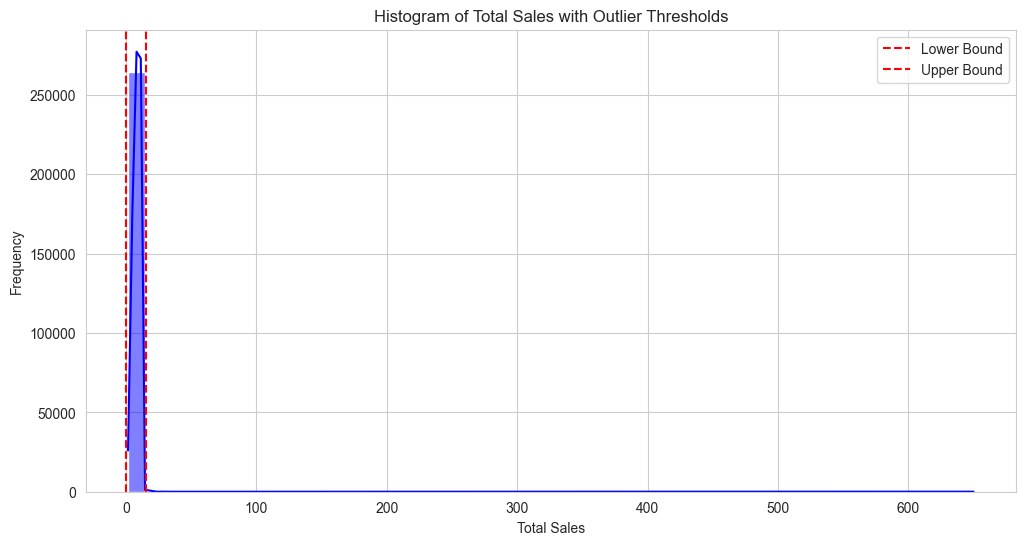

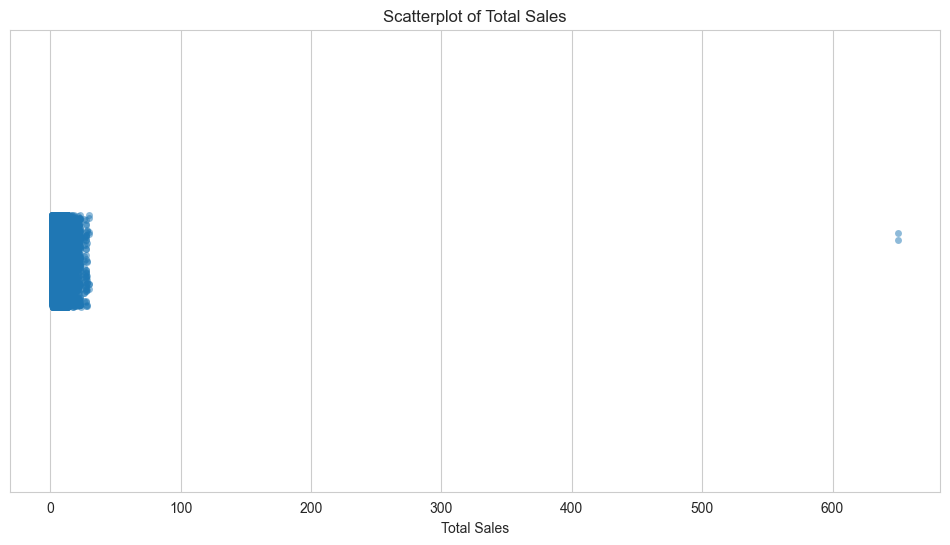

In [19]:

plt.figure(figsize=(12, 6))

# Boxplot with log scale
sns.boxplot(x=np.log1p(merged_data["TOT_SALES"]))  # Using log transformation
plt.title("Boxplot of Total Sales (Log Scale for Clarity)")
plt.xlabel("Log(Total Sales + 1)")
plt.show()

# Histogram with KDE to see distribution
plt.figure(figsize=(12, 6))
sns.histplot(merged_data["TOT_SALES"], bins=50, kde=True, color="blue")
plt.axvline(lower_bound, color="red", linestyle="dashed", label="Lower Bound")
plt.axvline(upper_bound, color="red", linestyle="dashed", label="Upper Bound")
plt.title("Histogram of Total Sales with Outlier Thresholds")
plt.xlabel("Total Sales")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Swarmplot (shows individual points clearly, may need sampling for large data)
plt.figure(figsize=(12, 6))
sns.stripplot(x=merged_data["TOT_SALES"], jitter=True, alpha=0.5)
plt.title("Scatterplot of Total Sales")
plt.xlabel("Total Sales")
plt.show()
